## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from sklearn.metrics import mean_absolute_error

## Setting path for reading data
   2 ways: either through google drive, or local pc path. Use the cell appropriately. Also change the paths accordingly. 
   Don't run the below 2 cells if not using on Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive
%cd CF_Data

/content/gdrive/MyDrive
/content/gdrive/MyDrive/CF_Data


## Alternating Least Squares Algorithm (ALS)

In [4]:
#Implementing Alternating Least Squares (ALS) Algorithm to predict the missing values
def ALS(train_data_matrix, k, learning_rate, max_iter):
    #Initialise U and V
    U = np.random.rand(train_data_matrix.shape[0], k)
    V = np.random.rand(train_data_matrix.shape[1], k)
    #Iterate over the number of iterations 
    for j in range(max_iter):
        #Update V
        for i in range(train_data_matrix.shape[1]):
            #Find the non-zero indices
            idx = np.where(train_data_matrix[:, i] > 0)[0]
            #Find the corresponding U values
            U_i = U[idx, :]
            #Find the corresponding ratings
            ratings = train_data_matrix[idx, i]
            #Find the V_i
            A = np.dot(U_i.T, U_i) + learning_rate * np.eye(k)
            b = np.dot(U_i.T, ratings)
            V_i = np.linalg.solve(A, b)
            #Update V
            V[i, :] = V_i
        #Update U
        for i in range(train_data_matrix.shape[0]):
            #Find the non-zero indices
            idx = np.where(train_data_matrix[i, :] > 0)[0]
            #Find the corresponding V values
            V_i = V[idx, :]
            #Find the corresponding ratings
            ratings = train_data_matrix[i, idx]
            #Find the U_i
            A = np.dot(V_i.T, V_i) + learning_rate * np.eye(k)
            b = np.dot(V_i.T, ratings)
            U_i = np.linalg.solve(A, b)
            #Update U
            U[i, :] = U_i.T
    return np.dot(U, V.T)

In [5]:
#Calculate NMAE for the users present in the test data
def NMAE(test_data, predicted_matrix):
    test_data = test_data[test_data['rating'] > 0]  
    NMAE = 0
    for line in test_data.itertuples():
        NMAE += abs(line[3] - predicted_matrix[line[1]-1, line[2]-1])
    NMAE = NMAE / len(test_data)
    #Normalise the NMAE by the range of the ratings in the test data and return
    return NMAE / (max(test_data['rating']) - min(test_data['rating']))

## Reading Data and running for 5-folds

In [43]:
#Performing ALS on the 5 fold datasets
def ALS_5fold(fold_index):
    #Read the data
    train_data = pd.read_csv(f'ml-100k/u{fold_index}.base', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
    test_data = pd.read_csv(f'ml-100k/u{fold_index}.test', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
    #Create a matrix of users and items
    train_data_matrix = np.zeros((943, 1682))
    for line in train_data.itertuples():
        train_data_matrix[line[1]-1, line[2]-1] = line[3]
    #Predict the missing values
    predicted_matrix = ALS(train_data_matrix, 6, 7, 20)
    #Calculate NMAE for the users present in the test data
    NMAE_ = NMAE(test_data, predicted_matrix)
    print(f'NMAE for fold {fold_index} is: {NMAE_}')
    return NMAE_

# Optimization

## Finding the range of hyperparameters, where best results can be expected
### Note: Next couple of cells are just for pattern observation, need to scroll a lot

## Varying Learning Rate

In [7]:
for i in range(1, 6):
    ALS_5fold(i)

NMAE for fold 1 is: 0.24058566204859225
NMAE for fold 2 is: 0.22633898529319313
NMAE for fold 3 is: 0.22563563197920403
NMAE for fold 4 is: 0.22697912955828234
NMAE for fold 5 is: 0.22782588587123737


In [12]:
for i in range(1, 6):
    ALS_5fold(i)

NMAE for fold 1 is: 0.22273058186598246
NMAE for fold 2 is: 0.21588762611798903
NMAE for fold 3 is: 0.21914796906713135
NMAE for fold 4 is: 0.2172045676811821
NMAE for fold 5 is: 0.21892098854706254


In [14]:
for i in range(1, 6):
    ALS_5fold(i)

NMAE for fold 1 is: 0.2191113679183334
NMAE for fold 2 is: 0.21284589374724497
NMAE for fold 3 is: 0.21457377851331125
NMAE for fold 4 is: 0.2127058975826296
NMAE for fold 5 is: 0.2137214873784152


In [16]:
for i in range(1, 6):
    ALS_5fold(i)

NMAE for fold 1 is: 0.21107284131725865
NMAE for fold 2 is: 0.20705357600647611
NMAE for fold 3 is: 0.20925686145279143
NMAE for fold 4 is: 0.20942404995684402
NMAE for fold 5 is: 0.21038793569477066


In [18]:
for i in range(1, 6):
    ALS_5fold(i)

NMAE for fold 1 is: 0.20932540499703392
NMAE for fold 2 is: 0.20519200676021196
NMAE for fold 3 is: 0.20503099270646222
NMAE for fold 4 is: 0.2041208343243921
NMAE for fold 5 is: 0.2068649614800484


In [20]:
for i in range(1, 6):
    ALS_5fold(i)

NMAE for fold 1 is: 0.20521108260757365
NMAE for fold 2 is: 0.20092157209784153
NMAE for fold 3 is: 0.2013458015177974
NMAE for fold 4 is: 0.2005196367553851
NMAE for fold 5 is: 0.19950351067035108


#### Lamda = 5

In [22]:
for i in range(1, 6):
    ALS_5fold(i)

NMAE for fold 1 is: 0.18986045301347274
NMAE for fold 2 is: 0.1868855064327854
NMAE for fold 3 is: 0.1882779420726974
NMAE for fold 4 is: 0.1872777985819066
NMAE for fold 5 is: 0.19003327151230476


##### Lamda=10

In [26]:
for i in range(1, 6):
    ALS_5fold(i)

NMAE for fold 1 is: 0.19316557242548268
NMAE for fold 2 is: 0.18916600525493224
NMAE for fold 3 is: 0.18957950252305408
NMAE for fold 4 is: 0.1897918368275614
NMAE for fold 5 is: 0.19430819293525134


##### Lamda=7.5

In [28]:
for i in range(1, 6):
    ALS_5fold(i)

NMAE for fold 1 is: 0.19053249815511186
NMAE for fold 2 is: 0.18714786890745808
NMAE for fold 3 is: 0.1875913532118417
NMAE for fold 4 is: 0.18782223083470184
NMAE for fold 5 is: 0.19126465402788914


##### Lamda=7

In [30]:
for i in range(1, 6):
    ALS_5fold(i)

NMAE for fold 1 is: 0.18999097399243536
NMAE for fold 2 is: 0.1870170177728325
NMAE for fold 3 is: 0.18791483990511987
NMAE for fold 4 is: 0.1879032707147518
NMAE for fold 5 is: 0.19061840123320145


### Varying k or the no. of factors, lamda = 7

##### k=20

In [32]:
for i in range(1, 6):
    ALS_5fold(i)

NMAE for fold 1 is: 0.19477422035185896
NMAE for fold 2 is: 0.1927233991763041
NMAE for fold 3 is: 0.19356750055297606
NMAE for fold 4 is: 0.19382461967826878
NMAE for fold 5 is: 0.19627785245782628


#### k=2

In [34]:
for i in range(1, 6):
    ALS_5fold(i)

NMAE for fold 1 is: 0.1897407260051318
NMAE for fold 2 is: 0.18726925745127126
NMAE for fold 3 is: 0.18750491578381487
NMAE for fold 4 is: 0.18717493170385477
NMAE for fold 5 is: 0.19035165714023672


##### k=6

In [36]:
for i in range(1, 6):
    ALS_5fold(i)

NMAE for fold 1 is: 0.18853557796234646
NMAE for fold 2 is: 0.18479855594970204
NMAE for fold 3 is: 0.1855723002056491
NMAE for fold 4 is: 0.18620453100451229
NMAE for fold 5 is: 0.18892278045313274


k=8

In [40]:
for i in range(1, 6):
    ALS_5fold(i)

NMAE for fold 1 is: 0.18978026698776512
NMAE for fold 2 is: 0.18514362457395375
NMAE for fold 3 is: 0.18682608518822455
NMAE for fold 4 is: 0.18663119539418088
NMAE for fold 5 is: 0.18957630918294205


### Varying Maximum Iterations, Lamda =7 and k=6

#### max_iter = 100

In [42]:
for i in range(1, 6):
    ALS_5fold(i)

NMAE for fold 1 is: 0.1886473859411727
NMAE for fold 2 is: 0.18487806242123062
NMAE for fold 3 is: 0.1854749493260189
NMAE for fold 4 is: 0.18622807141213193
NMAE for fold 5 is: 0.1891658646418497


##### max_iter = 20

In [44]:
for i in range(1, 6):
    ALS_5fold(i)

NMAE for fold 1 is: 0.1887609652245569
NMAE for fold 2 is: 0.18453820976941093
NMAE for fold 3 is: 0.18596520394580754
NMAE for fold 4 is: 0.18639950364025373
NMAE for fold 5 is: 0.18848879589442102


### Now varying between the above found best range

In [47]:
train_data = pd.read_csv(f'ml-100k/u2.base', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
test_data = pd.read_csv(f'ml-100k/u2.test', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
#Create a matrix of users and items
train_data_matrix = np.zeros((943, 1682))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]

In [49]:
#Opimise the hyperparameters to get the best RMSE and NMAE
#Hyperparameters to be optimised are k and max_iter
k = [1, 2, 3, 4, 5, 6, 7]
max_iter = [10, 20, 25, 30, 40, 50]
l_r = [5, 5.5, 6, 6.5, 6.7]
NMAE_list = []
for i in k:
    print(f'k= {i}')
    for j in max_iter:
        print(f'max_iter= {j}',end=':: ')
        for lr in l_r:
            predicted_ratings = ALS(train_data_matrix, i, lr, j)
            NMAE_list.append(NMAE(test_data, predicted_ratings))
            print(f'lr= {lr}',end='; ')
        print()

k= 1
max_iter= 10:: lr= 5; lr= 5.5; lr= 6; lr= 6.5; lr= 6.7; 
max_iter= 20:: lr= 5; lr= 5.5; lr= 6; lr= 6.5; lr= 6.7; 
max_iter= 25:: lr= 5; lr= 5.5; lr= 6; lr= 6.5; lr= 6.7; 
max_iter= 30:: lr= 5; lr= 5.5; lr= 6; lr= 6.5; lr= 6.7; 
max_iter= 40:: lr= 5; lr= 5.5; lr= 6; lr= 6.5; lr= 6.7; 
max_iter= 50:: lr= 5; lr= 5.5; lr= 6; lr= 6.5; lr= 6.7; 
k= 2
max_iter= 10:: lr= 5; lr= 5.5; lr= 6; lr= 6.5; lr= 6.7; 
max_iter= 20:: lr= 5; lr= 5.5; lr= 6; lr= 6.5; lr= 6.7; 
max_iter= 25:: lr= 5; lr= 5.5; lr= 6; lr= 6.5; lr= 6.7; 
max_iter= 30:: lr= 5; lr= 5.5; lr= 6; lr= 6.5; lr= 6.7; 
max_iter= 40:: lr= 5; lr= 5.5; lr= 6; lr= 6.5; lr= 6.7; 
max_iter= 50:: lr= 5; lr= 5.5; lr= 6; lr= 6.5; lr= 6.7; 
k= 3
max_iter= 10:: lr= 5; lr= 5.5; lr= 6; lr= 6.5; lr= 6.7; 
max_iter= 20:: lr= 5; lr= 5.5; lr= 6; lr= 6.5; lr= 6.7; 
max_iter= 25:: lr= 5; lr= 5.5; lr= 6; lr= 6.5; lr= 6.7; 
max_iter= 30:: lr= 5; lr= 5.5; lr= 6; lr= 6.5; lr= 6.7; 
max_iter= 40:: lr= 5; lr= 5.5; lr= 6; lr= 6.5; lr= 6.7; 
max_iter= 50:: l

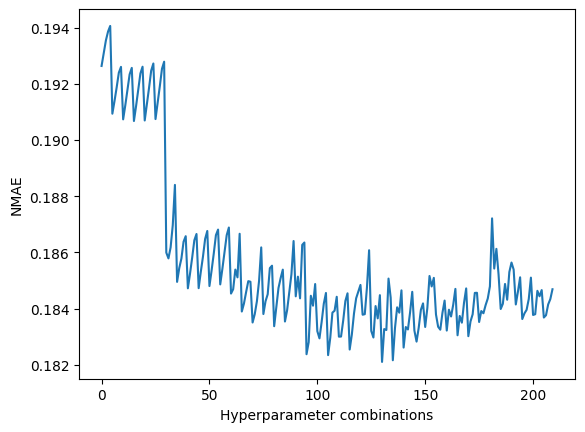

In [50]:
#Plot the RMSE and NMAE for different hyperparameters
plt.plot(NMAE_list)
plt.xlabel('Hyperparameter combinations')
plt.ylabel('NMAE')
plt.show()

In [51]:
#Saving NMAE_list in a pickle file
import pickle
with open('NMAE_list.pickle', 'wb') as f:
    pickle.dump(NMAE_list, f)

0.18210595250383516
130


### Finding best parameters

In [93]:
#index of the minimum NMAE
min_index = NMAE_list.index(min(NMAE_list)) + 1
#Find the least RMSE and NMAE
print()
counter = 0
for i in k:
    for j in max_iter:
        for lr in l_r:
            counter+=1
            if counter==min_index:
                print(f'Minimum NMAE is: {min(NMAE_list)}. Parameters: k= {i}, max_iter= {j}, l_r= {lr}')
                break


Minimum NMAE is: 0.18210595250383516. Parameters: k= 5, max_iter= 25, l_r= 5


## Running for the best Parameters, for all folds

In [82]:
#Performing ALS on the 5 fold datasets
def ALS_5fold(fold_index):
    #Read the data
    train_data = pd.read_csv(f'ml-100k/u{fold_index}.base', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
    test_data = pd.read_csv(f'ml-100k/u{fold_index}.test', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
    #Create a matrix of users and items
    train_data_matrix = np.zeros((943, 1682))
    for line in train_data.itertuples():
        train_data_matrix[line[1]-1, line[2]-1] = line[3]
    #Predict the missing values
    predicted_matrix = ALS(train_data_matrix, 5, 5, 25)
    #Calculate NMAE for the users present in the test data
    NMAE_ = NMAE(test_data, predicted_matrix)
    print(f'NMAE for fold {fold_index} is: {NMAE_}')
    return NMAE_

NMAE_fold = [] 
for i in range(1, 6):
    NMAE_fold.append(ALS_5fold(i))

print(f'Average NMAE is: {sum(NMAE_fold)/len(NMAE_fold)}')

NMAE for fold 1 is: 0.18674183999746669
NMAE for fold 2 is: 0.18255420025435906
NMAE for fold 3 is: 0.1831302061183982
NMAE for fold 4 is: 0.18441261955874175
NMAE for fold 5 is: 0.18524785653582043
Average NMAE is: 0.1844173444929572


# Final Compiled Output

In [89]:
#Print a table of the hyperparameters as columns, folds as rows and NMAE as values
#Create a dataframe with the hyperparameters as columns, folds as rows and NMAE as values
df = pd.DataFrame(columns=['type','NMAE','k', 'max_iter', 'l_r'], index=range(1, 7), dtype='float')
#insert the NMAE values in the dataframe
for i in range(1, 6):
    df.loc[i, 'type'] = f'Fold {i}'
    df.loc[i, 'NMAE'] = NMAE_fold[i-1]
df.loc[6, 'type'] = 'Average'
df.loc[6,'NMAE'] = sum(NMAE_fold)/len(NMAE_fold)
#insert the hyperparameters in the dataframe
for i in range(1, 7):
    df.loc[i, 'k'] = 5
    df.loc[i, 'max_iter'] = 25
    df.loc[i, 'l_r'] = 5
df

,type,NMAE,k,max_iter,l_r
1,Fold 1,0.186742,5.0,25.0,5.0
2,Fold 2,0.182554,5.0,25.0,5.0
3,Fold 3,0.183130,5.0,25.0,5.0
4,Fold 4,0.184413,5.0,25.0,5.0
5,Fold 5,0.185248,5.0,25.0,5.0
6,Average,0.184417,5.0,25.0,5.0


# Rounded off results to the nearest rating integer

In [94]:
#Performing ALS on the 5 fold datasets
def ALS_5fold(fold_index):
    #Read the data
    train_data = pd.read_csv(f'ml-100k/u{fold_index}.base', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
    test_data = pd.read_csv(f'ml-100k/u{fold_index}.test', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
    #Create a matrix of users and items
    train_data_matrix = np.zeros((943, 1682))
    for line in train_data.itertuples():
        train_data_matrix[line[1]-1, line[2]-1] = line[3]
    #Predict the missing values
    predicted_matrix = ALS(train_data_matrix, 5, 5, 25)
    predicted_matrix = np.round(predicted_matrix)
    #Calculate NMAE for the users present in the test data
    NMAE_ = NMAE(test_data, predicted_matrix)
    print(f'NMAE for fold {fold_index} is: {NMAE_}')
    return NMAE_

NMAE_fold = [] 
for i in range(1, 6):
    NMAE_fold.append(ALS_5fold(i))

print(f'Average NMAE is: {sum(NMAE_fold)/len(NMAE_fold)}')

NMAE for fold 1 is: 0.175725
NMAE for fold 2 is: 0.1725625
NMAE for fold 3 is: 0.173275
NMAE for fold 4 is: 0.17445
NMAE for fold 5 is: 0.1761875
Average NMAE is: 0.17443999999999998


In [95]:
#Print a table of the hyperparameters as columns, folds as rows and NMAE as values
#Create a dataframe with the hyperparameters as columns, folds as rows and NMAE as values
df = pd.DataFrame(columns=['type','NMAE','k', 'max_iter', 'l_r'], index=range(1, 7), dtype='float')
#insert the NMAE values in the dataframe
for i in range(1, 6):
    df.loc[i, 'type'] = f'Fold {i}'
    df.loc[i, 'NMAE'] = NMAE_fold[i-1]
df.loc[6, 'type'] = 'Average'
df.loc[6,'NMAE'] = sum(NMAE_fold)/len(NMAE_fold)
#insert the hyperparameters in the dataframe
for i in range(1, 7):
    df.loc[i, 'k'] = 5
    df.loc[i, 'max_iter'] = 25
    df.loc[i, 'l_r'] = 5
df

,type,NMAE,k,max_iter,l_r
1,Fold 1,0.175725,5.0,25.0,5.0
2,Fold 2,0.172563,5.0,25.0,5.0
3,Fold 3,0.173275,5.0,25.0,5.0
4,Fold 4,0.174450,5.0,25.0,5.0
5,Fold 5,0.176187,5.0,25.0,5.0
6,Average,0.174440,5.0,25.0,5.0
